In [96]:
import bandit
from bandit.environment import actions, get_cost, preprocess, random_state
from bandit.logistic import LogisticBandit, LogisticPerArmBandit
from bandit.tree import TreeBandit, TreePerArmBandit
from bandit.policy import Softmax

In [97]:
import importlib

importlib.reload(bandit)
importlib.reload(bandit.base)
importlib.reload(bandit.logistic)
importlib.reload(bandit.policy)

from bandit.environment import get_cost, preprocess, random_state
from bandit.logistic import LogisticBandit, LogisticPerArmBandit
from bandit.policy import Softmax

In [98]:
import numpy as np
from sklearn.feature_extraction import FeatureHasher

N = 500
n_arms = len(actions)
bandit = TreeBandit(n_arms)
rng = np.random.RandomState(42)

policy = Softmax(tau=0.2, rng=rng)
policy
total_cost = 0
avg_cost = []
for i in range(N):
    if i % 100 == 0:
        print(i)
    state = random_state(rng)
    rewards = bandit.pull(state)
    action = policy(rewards)
    reward = get_cost(state, actions[action])
    bandit.update(state, action, reward)
    total_cost += np.maximum(reward, 0)
    avg_cost.append(total_cost / (i + 1))

0


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [92]:
total_cost

304.0

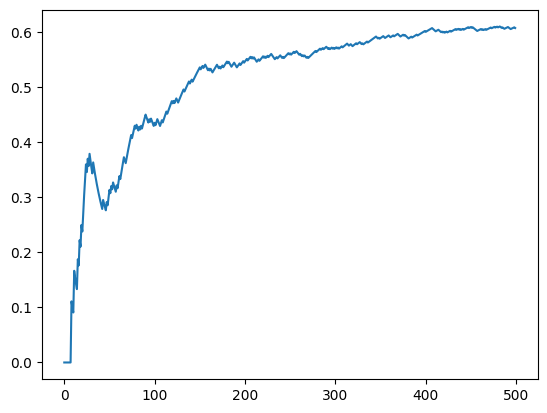

In [93]:
import matplotlib.pyplot as plt

plt.plot(range(N), avg_cost)

In [ ]:
acts = []
for i in range(10):
    state = {"user": "Anna", "time_of_day": "morning"}
    rewards = bandit.pull(state)
    action = policy(rewards)
    reward = get_cost(state, actions[action])
    rewards, action, actions[action], reward, policy.softmax(rewards), np.random.choice(
        range(n_arms), p=policy.softmax(rewards)
    )
    acts.append(actions[action])
acts

In [9]:
X = bandit.preprocess.transform([{"_action": i} | state for i in range(n_arms)])
bandit.model.predict_proba(X)[:, -1]

array([0.44780092, 0.72917191, 0.09078952, 0.06593016, 0.0845519 ,
       0.10971673, 0.09669983])

In [10]:
reward = get_cost(state, "sports")
reward

1.0

In [11]:
# for i in range(100):
#     bandit.update(state, 1, 1)

In [12]:
bandit.model.classes_

array([-1.,  1.])

In [35]:
from itertools import product

state = {"user": "Anna", "time_of_day": "morning"}

for kvs in product(state.items(), [("action", 1)]):
    print("^".join([f"{k}:{v}" for k, v in kvs]))

user:Anna^action:1
time_of_day:morning^action:1
